In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:

    def __init__(self, k=5, max_iters=100, plot_steps=False, wait_time=-1):
        self.n_features = None
        self.n_samples = None
        self.X = None
        self.k = k
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.wait_time = wait_time

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.k)]
        # mean features vector for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimization
        for _ in range(self.max_iters):
            # update clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self.plot_steps:
                self.plot()
            # check if converged
            if self._is_converted(centroids_old, self.centroids):
                break

        # return cluster labels
        return self._get_cluster_labels(self.clusters)

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converted(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def plot(self):
        if self.wait_time > 0:
            time.sleep(self.wait_time)
            clear_output(wait=True)
        
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
        plt.plot()


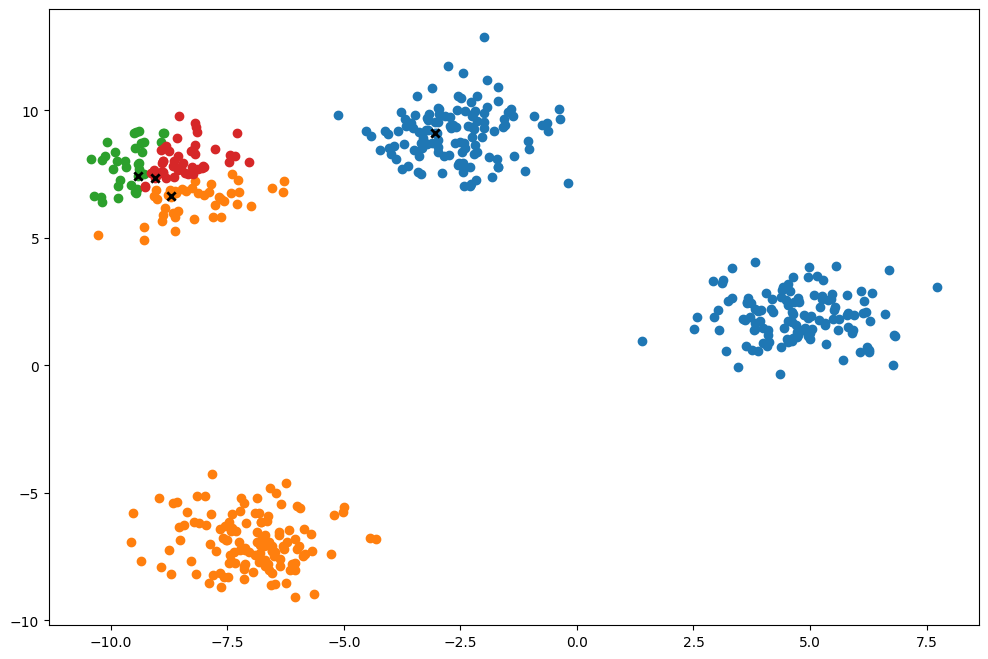

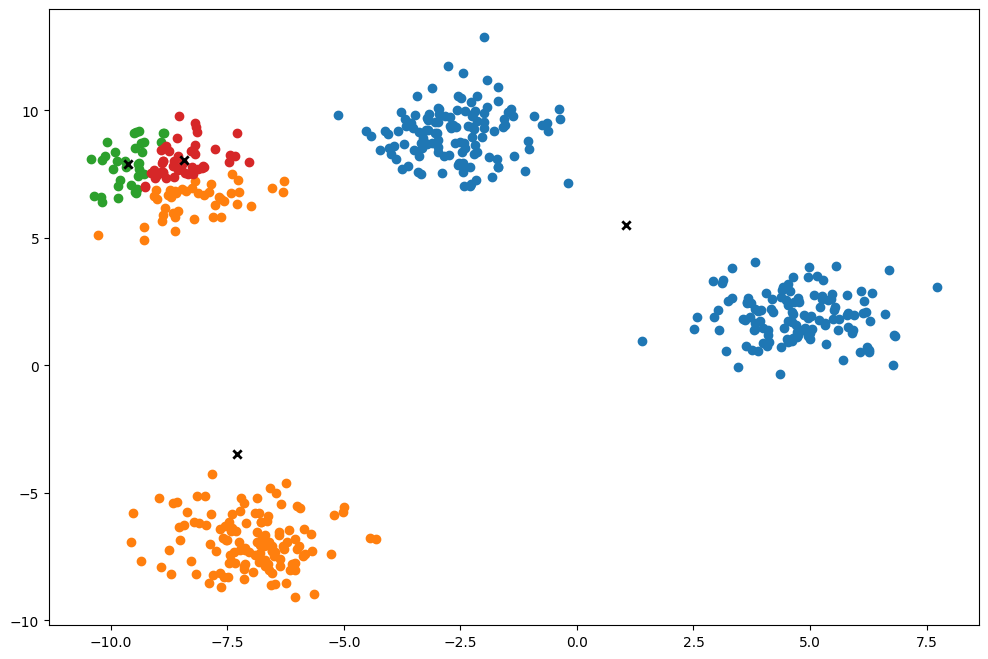

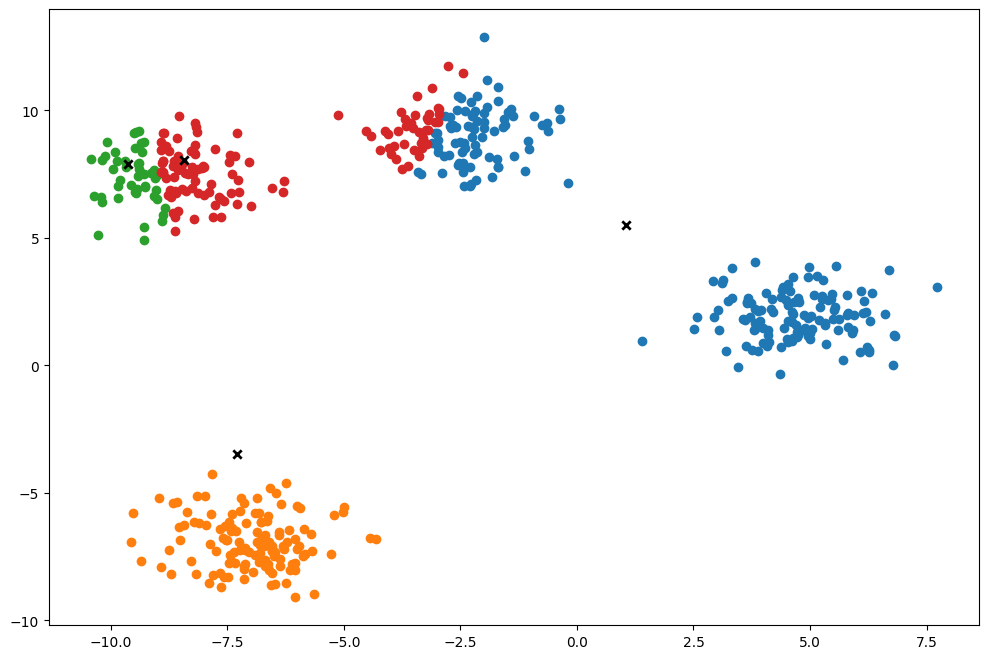

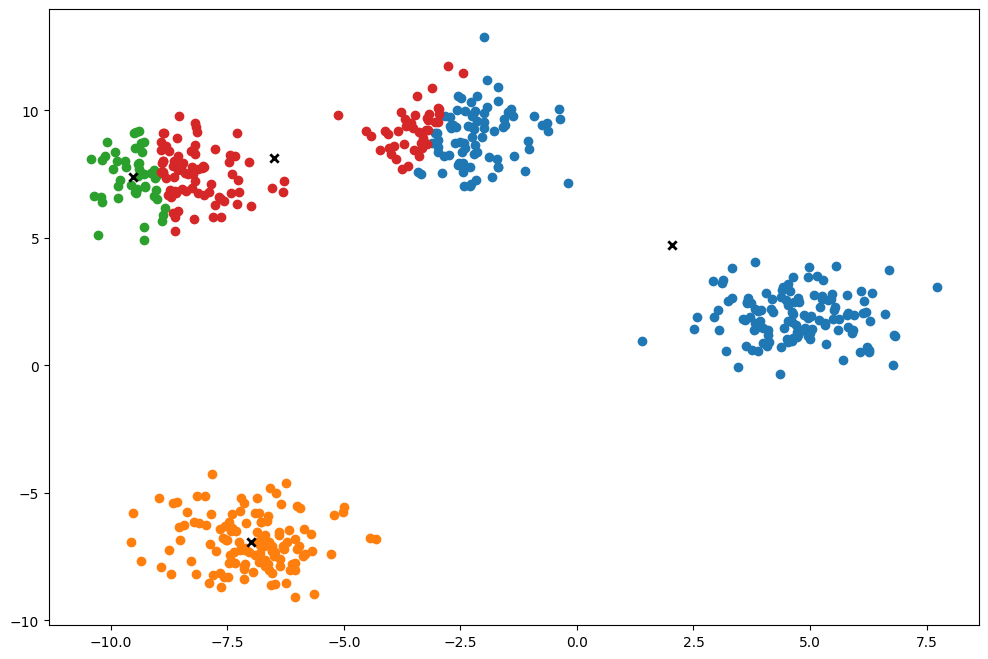

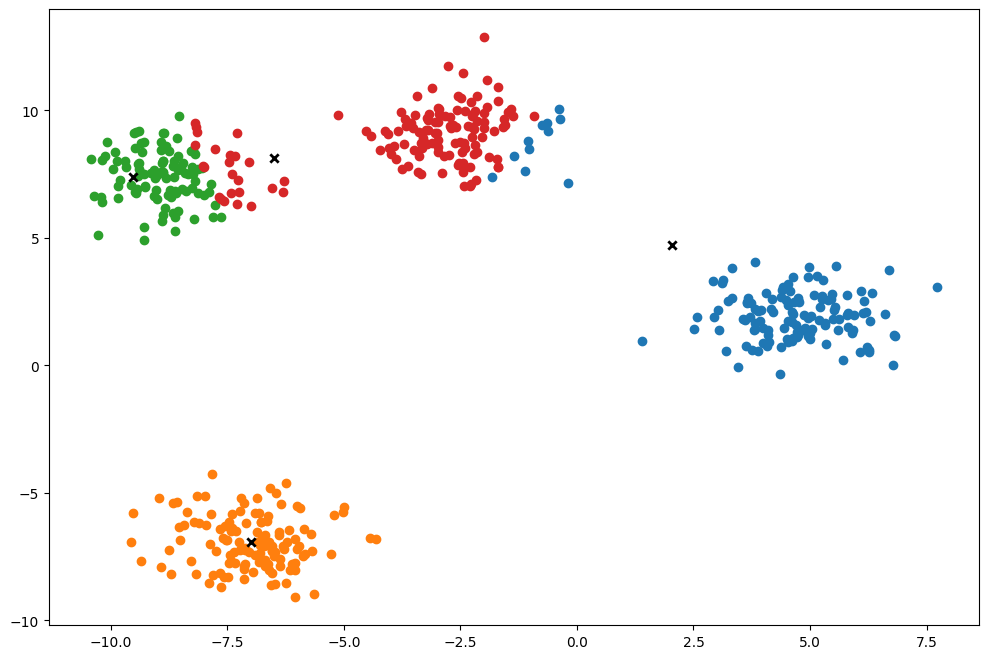

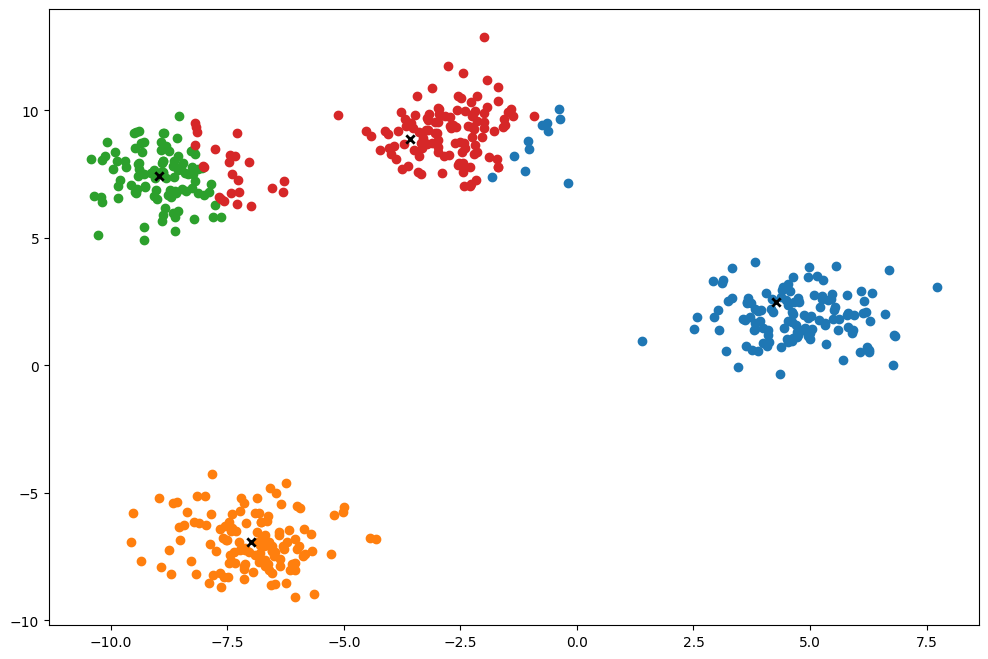

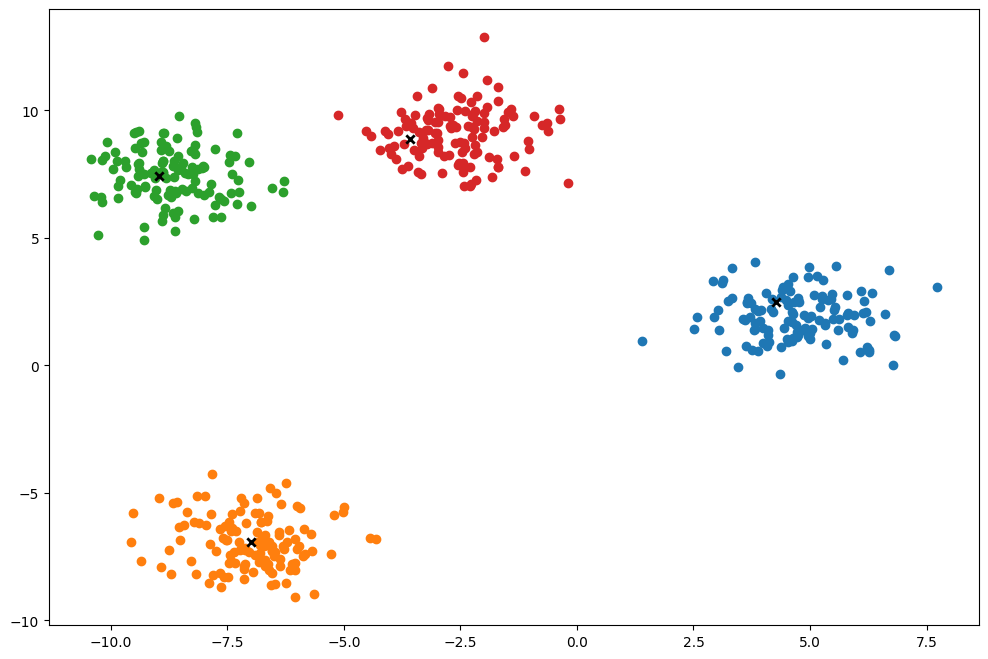

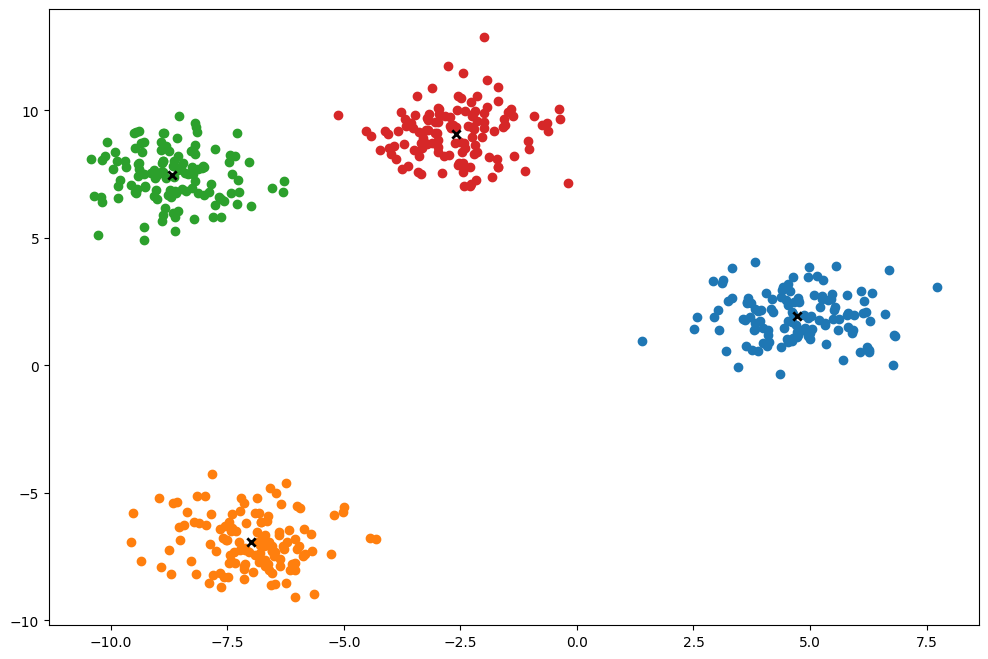

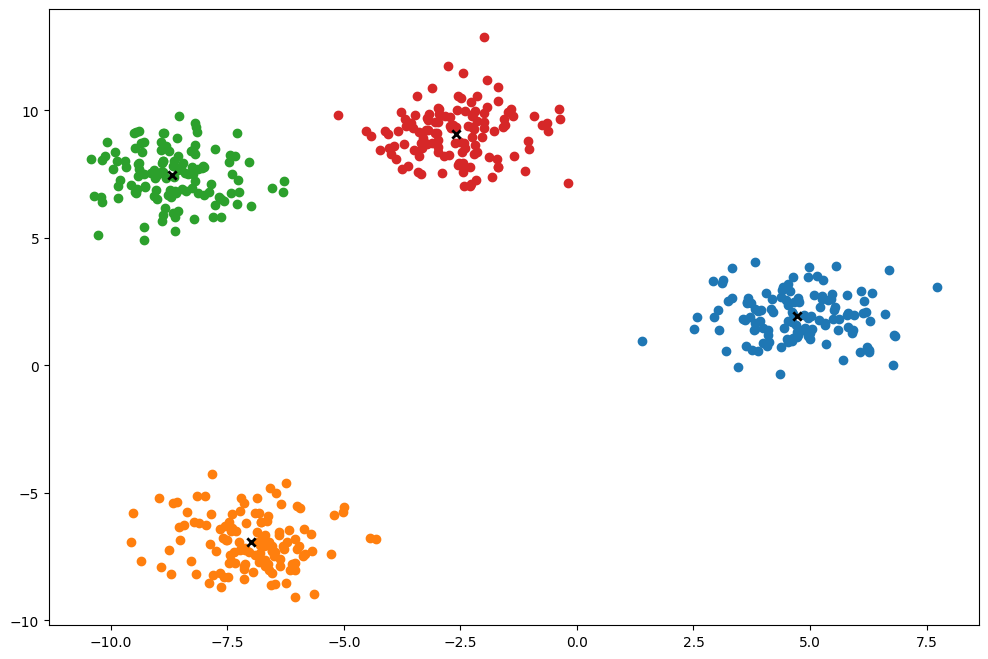

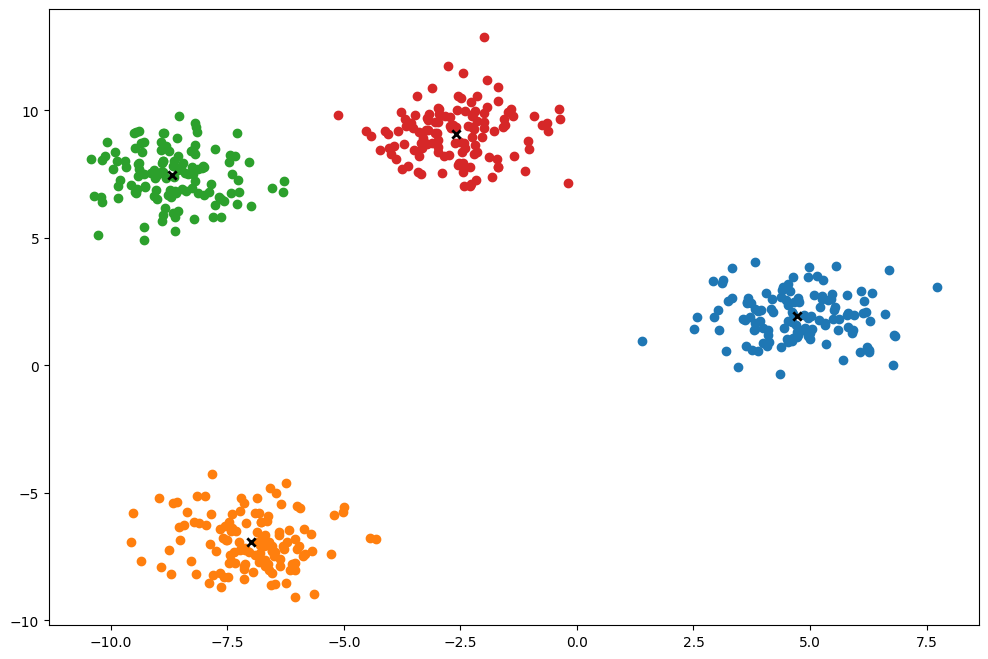

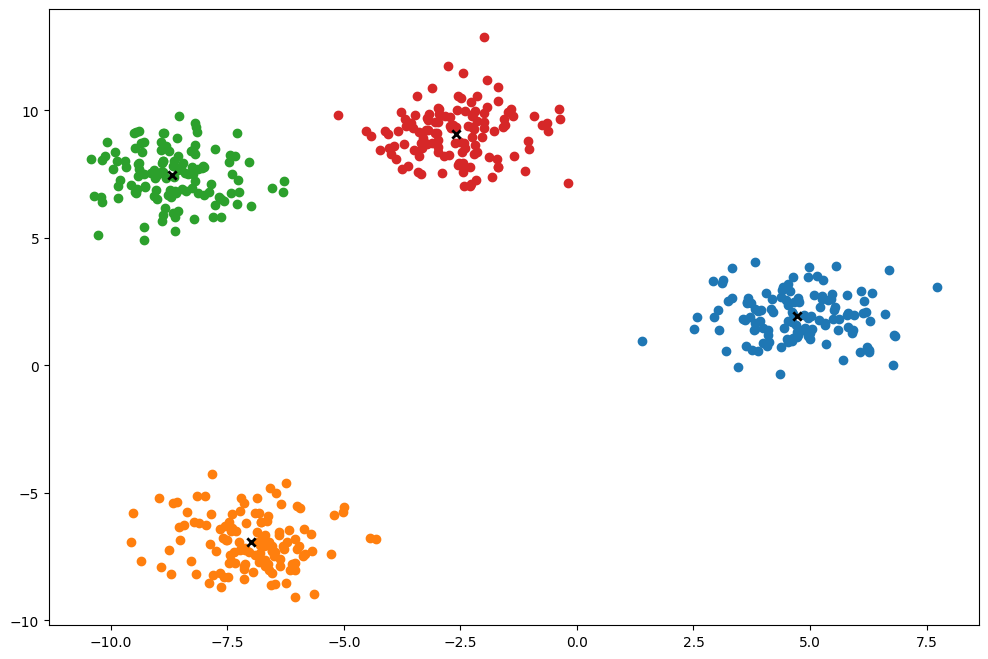

In [6]:
import numpy as np

from sklearn.datasets import make_blobs

np.random.seed(42)

X, y = make_blobs(centers=4, n_samples=500,
                  n_features=2, shuffle=True,
                  random_state=42)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

In [ ]:
model = KMeans(k=clusters, max_iters=150,
               plot_steps=True, wait_time=1)
y_pred = model.predict(X)

model.plot()